In [1]:
#importing dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#displaying all the rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [3]:
#read and load the data
data = pd.read_csv('NESARC dataset.csv', low_memory = False)
print(len(data))
print(len(data.columns))

43093
3010


In [4]:
#converting all the varibles into upper-case letters
data.columns = map(str.upper , data.columns)

In [5]:
#visualizing Frequency distributions
c1 = data['TAB12MDX'].value_counts(sort = False) 
print(c1)

0    38131
1     4962
Name: TAB12MDX, dtype: int64


In [6]:
#visualizing Percentage distributions
p1 = data['TAB12MDX'].value_counts(sort = False , normalize = True)
print(p1*100)

0    88.485369
1    11.514631
Name: TAB12MDX, dtype: float64


In [7]:
#visualizing Frequency distributions
c2 = data['CHECK321'].value_counts(sort = False)
print(c2)

1.0    9913
2.0    8078
9.0      22
Name: CHECK321, dtype: int64


In [8]:
#visualizing Percentage distributions
p2 = data['CHECK321'].value_counts(sort = False , normalize = True)
print(p2)

1.0    0.550325
2.0    0.448454
9.0    0.001221
Name: CHECK321, dtype: float64


In [9]:
#visualizing Frequency distributions and "dropna = False" displays missing values
c3 = data['S3AQ3C1'].value_counts(sort = True, dropna = False)
print(c3)

NaN     25080
20.0     5366
10.0     3077
5.0      1070
40.0      993
1.0       934
3.0       923
30.0      909
2.0       884
15.0      851
4.0       573
6.0       463
8.0       299
7.0       269
99.0      262
60.0      241
12.0      230
25.0      155
50.0      106
18.0       59
9.0        49
80.0       47
16.0       40
13.0       34
35.0       30
14.0       25
11.0       23
17.0       22
98.0       15
70.0       12
22.0       10
45.0        8
24.0        7
19.0        5
29.0        3
28.0        3
55.0        2
27.0        2
37.0        2
23.0        2
75.0        2
66.0        1
57.0        1
33.0        1
34.0        1
21.0        1
39.0        1
Name: S3AQ3C1, dtype: int64


In [10]:
#another method to visualize frequency distributions
ct1= data.groupby('TAB12MDX').size()
print(ct1)

TAB12MDX
0    38131
1     4962
dtype: int64


In [11]:
#another method to visualize percentage distributions
pt1= data.groupby('TAB12MDX').size() * 100 /len(data)
print(pt1)

TAB12MDX
0    88.485369
1    11.514631
dtype: float64


In [12]:
#re-defining the data in which only smokers between age 18 to 25 and those who have smoked cigrattes in the past 12 months(i.e. latest smokers) are taken in consideration
sub1 = data[(data['AGE']>= 18) & (data['AGE'] <= 25) & (data['CHECK321'] == 1)]
sub2 = sub1.copy()

In [13]:
#visualizing Frequency distributions for age variable with re-formed data
x5  = sub2['AGE'].value_counts(sort = False)
print(x5)

18    161
19    200
20    221
21    239
22    228
23    231
24    241
25    185
Name: AGE, dtype: int64


In [14]:
#visualizing Frequency distributions with re-formed data
x2 = sub2['S3AQ3B1'].value_counts(sort = False)
print(x2)

1.0    1320
2.0      68
4.0      88
3.0      91
5.0      65
6.0      71
9.0       3
Name: S3AQ3B1, dtype: int64


In [15]:
#setting aside missing data
sub2['S3AQ3B1'] = sub2['S3AQ3B1'].replace(9, np.nan)

c2 = sub2['S3AQ3B1'].value_counts(sort=False, dropna=False)
print(c2)

1.0    1320
2.0      68
4.0      88
3.0      91
5.0      65
6.0      71
NaN       3
Name: S3AQ3B1, dtype: int64


In [16]:
#re-coding values
recode1 = {1: 6, 2: 5, 3: 4, 4: 3, 5: 2, 6: 1}
sub2['USFREQ']= sub2['S3AQ3B1'].map(recode1)

In [17]:
#re-coding values
recode2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub2['USFREQMO']= sub2['S3AQ3B1'].map(recode2)

In [18]:
#visualizing Frequency distributions
c3 = sub2['USFREQMO'].value_counts(sort = False , dropna = False)
print(c3)

30.0    1320
22.0      68
5.0       88
14.0      91
2.5       65
1.0       71
NaN        3
Name: USFREQMO, dtype: int64


In [19]:
#creating secondary variables
sub2['NUMCIGMO_EST']=sub2['USFREQMO'] * sub2['S3AQ3C1']

In [20]:
#visualizing Frequency distributions
c4 = sub2['NUMCIGMO_EST'].value_counts(sort = True)
print(c4)

600.0     357
300.0     350
150.0     108
450.0      97
180.0      47
120.0      46
90.0       45
210.0      39
900.0      38
10.0       38
240.0      36
5.0        34
1200.0     29
1.0        29
60.0       28
360.0      25
30.0       25
70.0       22
42.0       19
28.0       17
56.0       15
25.0       14
66.0       14
15.0       14
2.0        14
750.0      13
20.0       13
7.5        12
3.0        12
220.0      12
2.5        11
110.0      11
140.0      10
44.0        9
12.5        9
50.0        7
390.0       7
88.0        6
270.0       6
2970.0      5
480.0       5
100.0       5
330.0       4
132.0       4
22.0        4
84.0        3
540.0       3
154.0       3
14.0        3
176.0       3
510.0       2
1800.0      2
4.0         2
35.0        2
420.0       2
280.0       1
840.0       1
810.0       1
2400.0      1
2178.0      1
24.0        1
2940.0      1
1050.0      1
570.0       1
98.0        1
8.0         1
6.0         1
17.5        1
Name: NUMCIGMO_EST, dtype: int64


In [21]:
#visualizing Frequency distributions
c5 = sub2['AGE'].value_counts(sort=False)
print(c5)

18    161
19    200
20    221
21    239
22    228
23    231
24    241
25    185
Name: AGE, dtype: int64


In [22]:
#grouping values within individual variables
sub2['AGEGROUP4']=pd.qcut(sub2.AGE, 4, labels=["1=0%tile","2=25%tile","3=50%tile","4=75%tile"])
c4 = sub2['AGEGROUP4'].value_counts(sort=False, dropna=True)
print(c4)

1=0%tile     582
2=25%tile    467
3=50%tile    231
4=75%tile    426
Name: AGEGROUP4, dtype: int64


In [23]:
#grouping values within individual variables
sub2['AGEGROUP3'] = pd.cut(sub2.AGE, [17, 20, 22, 25])
c5 = sub2['AGEGROUP3'].value_counts(sort=False, dropna=True)
print(c5)

(17, 20]    582
(20, 22]    467
(22, 25]    657
Name: AGEGROUP3, dtype: int64


In [24]:
#using cross-tab function which allows us to cross to two variables with one another to determine which ages were included in which level of the variable AGEGROUP3
print (pd.crosstab(sub2['AGEGROUP3'], sub2['AGE']))

AGE         18   19   20   21   22   23   24   25
AGEGROUP3                                        
(17, 20]   161  200  221    0    0    0    0    0
(20, 22]     0    0    0  239  228    0    0    0
(22, 25]     0    0    0    0    0  231  241  185


In [25]:
#change format from numeric to categorical
sub2["TAB12MDX"] = sub2["TAB12MDX"].astype('category')

Text(0.5, 1.0, 'Nicotine dependence in past 12 months among young adult smokers')

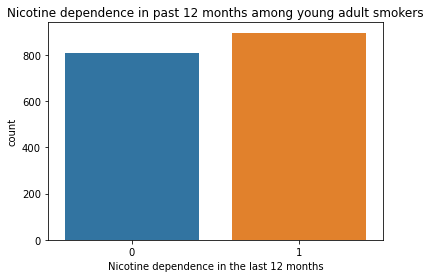

In [26]:
#univariate graph of a categorical variable
sns.countplot(x = 'TAB12MDX' , data = sub2)
plt.xlabel('Nicotine dependence in the last 12 months')
plt.title('Nicotine dependence in past 12 months among young adult smokers')

Text(0.5, 1.0, 'Estimated number of cigrattes smoked per month among young adult smokers')

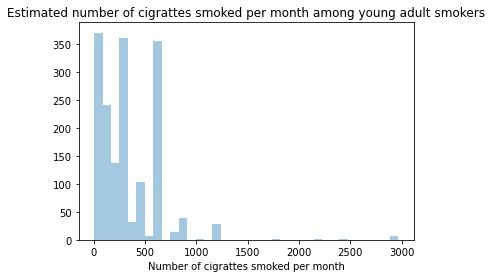

In [27]:
#univariate histogram for quantitative variable
sns.distplot(sub2["NUMCIGMO_EST"].dropna() ,kde = False)
plt.xlabel("Number of cigrattes smoked per month")
plt.title("Estimated number of cigrattes smoked per month among young adult smokers")

In [28]:
#creating new variable "Packs Smoked per month"
sub2['PACKSPERMONTH'] = sub2['NUMCIGMO_EST'] / 20

In [29]:
#visualizing Frequency distributions
ppm = sub2['PACKSPERMONTH'].value_counts(sort = True)
print(ppm)

30.000     357
15.000     350
7.500      108
22.500      97
9.000       47
6.000       46
4.500       45
10.500      39
45.000      38
0.500       38
12.000      36
0.250       34
60.000      29
0.050       29
3.000       28
1.500       25
18.000      25
3.500       22
2.100       19
1.400       17
2.800       15
1.250       14
0.750       14
3.300       14
0.100       14
1.000       13
37.500      13
11.000      12
0.375       12
0.150       12
5.500       11
0.125       11
7.000       10
0.625        9
2.200        9
2.500        7
19.500       7
4.400        6
13.500       6
24.000       5
148.500      5
5.000        5
16.500       4
6.600        4
1.100        4
7.700        3
8.800        3
0.700        3
27.000       3
4.200        3
0.200        2
90.000       2
25.500       2
21.000       2
1.750        2
1.200        1
120.000      1
0.300        1
14.000       1
40.500       1
52.500       1
0.400        1
42.000       1
0.875        1
108.900      1
147.000      1
4.900     

In [30]:
#basic statistical details
sub2['PACKSPERMONTH'].describe()

count    1703.000000
mean       16.458735
std        15.622447
min         0.050000
25%         4.950000
50%        15.000000
75%        30.000000
max       148.500000
Name: PACKSPERMONTH, dtype: float64

In [31]:
#creating categories 
sub2['PACKCATEGORY'] = pd.cut(sub2.PACKSPERMONTH, [0,5,10,20,30,147])

In [32]:
#change format from numeric to categorical
sub2['PACKCATEGORY'] = sub2['PACKCATEGORY'].astype('category')

In [33]:
#basic statistical details
sub2['PACKCATEGORY'].describe()

count         1698
unique           5
top       (10, 20]
freq           480
Name: PACKCATEGORY, dtype: object

In [34]:
#visualizing Frequency distributions
ppm = sub2['PACKCATEGORY'].value_counts(sort = False, dropna = True)
print(ppm)

(0, 5]       431
(5, 10]      232
(10, 20]     480
(20, 30]     467
(30, 147]     88
Name: PACKCATEGORY, dtype: int64


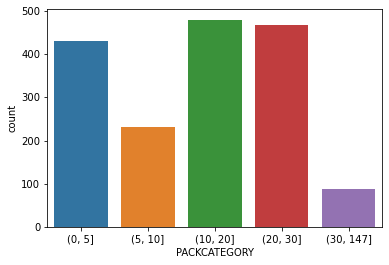

In [37]:
sns.countplot(x = 'PACKCATEGORY' , data = sub2)

In [35]:
#transforms to numeric variable
sub2['TAB12MDX'] = pd.to_numeric(sub2['TAB12MDX'])

Text(6.799999999999997, 0.5, 'Proportion nicotine dependent')

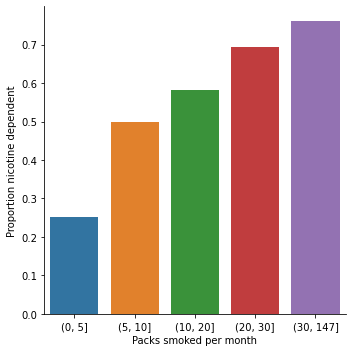

In [36]:
#bi-variate bar graph
sns.catplot(x ='PACKCATEGORY', y ='TAB12MDX', data = sub2, kind ="bar", ci = None)
plt.xlabel('Packs smoked per month')
plt.ylabel("Proportion nicotine dependent")